In [23]:
from __future__ import division
%matplotlib inline
import sys 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as io
import pickle

import scipy.stats

import itertools

In [6]:
prj_dir = '/Volumes/hoycw_clust/PRJ_Error/'
results_dir = prj_dir+'results/'
fig_type = '.png'
data_dir = prj_dir+'data/'
sbj_dir  = data_dir+SBJ+'/'
# paths = {'Rana': '/Users/colinhoy/Code/PRJ_Error/data/logs/',
#          'Adi': '/Users/colinhoy/Code/PRJ_Error/data/logs/',
#          'IR57': '/Users/colinhoy/Code/PRJ_Error/data/logs/'}
logs = {'Rana_1.6': 'Rana2_response_log_20170321103129_DATA.txt',
        'Adi_1.7': 'adi_response_log_20170321153641.txt',
        'CP22': '222_response_log_20170609140407.txt',
        'CP23': '223_response_log_20170930123015.txt',
        'CP241': '224-1_response_log_20171206121023.txt',
        'CP242': 'cp24_2_response_log_20171209120902.txt',
        'IR57': '857_response_log_20170322112243_CWHedit.txt',#CWHedit added n_training, n_examples lines
        'IR60': '60_response_log_20170613100307.txt',
        'IR62': 'ir62_response_log_20170713124719.txt',
        'IR63': 'IR63_response_log_20170921095757.txt',
        'IR65': '865_response_log_20171207130759.txt',
        'IR66': 'ir66_response_log_20171219124409.txt',
        'IR67': 'ir673_response_log_20180124103600.txt',
        'IR68': 'IR68_response_log_20180124140950.txt',
        'IR69': '869p2_response_log_20180211111609.txt',#this is 2nd run, another one before!
        'IR71': '71_response_log_20180221115510.txt',
        'IR72': 'Ir72_response_log_20180325133520.txt',#2 log files, this has easy, other has hard blocks
        'IR74': 'ir742_response_log_20180327170333.txt',
        'IR75': 'IR75_response_log_20180531221813.txt',
        'IR76': 'IR76_response_log_20180603181356.txt',
        'IR77': '8772_response_log_20180620124229.txt',#2/3 logs, has 2 easy, 8773 has 2 hards
        'IR78': 'IR78_response_log_20180628052715.txt',
        'IR79': 'IR79_response_log_20180710112314.txt',
        'IR82': 'IR82_response_log_20180928162311.txt',
        'IR84': 'IR84_response_log_20181025094454.txt',
        'P1': 'Pilot1_2_response_log_20170412131644.txt',
        'P2': 'pilot2_response_log_20170412140615.txt',
        'P3': 'pilot3_response_log_20170413110228.txt',
        'P4': 'Pilot4_2_response_log_20170418140941.txt',
        'P5': 'colin_real_response_log_20170412103113.txt',
        'P6': 'pilot_adi_response_log_20170414122257.txt',
        'P7': 'pilot_Rana_response_log_20170415155844.txt',
        'P8': 'Giao_response_log_20170419161340.txt',
        'P9': 'Sundberg_response_log_20170419150222.txt',
        'colin_vec': 'colin_circle_wVec_response_log_20171222141248.txt',
        'colin_novec': 'colin_noVec_response_log_20171222142110.txt'
       }

## Load all SBJ data

In [46]:
grp_acc

ITI type
0.00    0.200000
0.50    0.413462
0.85    0.439252
1.20    0.521008
Name: Hit, dtype: float64

In [81]:
tmp1 = data['IR75'].groupby(['Condition','ITI type'])
tmp2 = data['IR57'].groupby(['Condition','ITI type'])
acc1 = tmp1['Hit'].agg(np.mean)
acc2 = tmp2['Hit'].agg(np.mean)

In [83]:
acc12 = pd.concat([acc1,acc2])

In [89]:
type(tmp1)

pandas.core.groupby.DataFrameGroupBy

# FUCK trying to groupby and such, just get arrays of the variables and build a new dataframe!

In [95]:

for ix in range(len(data)):
    data.loc[ix,'Accuracy'] = accuracy[data.loc[ix,'Block'],data.loc[ix,'Condition']]

0.33333333333333331

In [48]:
SBJs = [sbj for sbj in logs.keys() if sbj[:2]=='IR']
data = {}
for sbj_ix, sbj in enumerate(SBJs):
    # Load original data
    behav_fname = os.path.join(sbj_dir,'03_events',SBJ+'_behav.csv')
    data[sbj] = pd.read_csv(behav_fname)
    # Compute accuracy per block
    accuracy = data[sbj]['Hit'].groupby([data[sbj]['Condition'],data[sbj]['ITI type']]).mean()
#     for ix in range(len(data[sbj])):
#         data[sbj].loc[ix,'Accuracy'] = accuracy[data[sbj].loc[ix,'Block'],data[sbj].loc[ix,'Condition']]
    # Compile across SBJs
    if sbj_ix==0:
        grp_acc = accuracy
    else:
        grp_acc = pd.concat([grp_acc,accuracy])

In [90]:
all_data = data[SBJs[0]]
for sbj in SBJs[1:]:
    all_data = pd.concat([all_data,data[sbj]])

In [92]:
all_acc = all_data['Hit'].groupby([all_data['Condition'],all_data['ITI type']]).mean()



In [93]:
all_acc

Condition  ITI type
easy       0.00        0.333333
           0.50        0.629630
           0.85        0.708333
           1.20        0.769231
hard       0.00        0.000000
           0.50        0.180000
           0.85        0.220339
           1.20        0.222222
Name: Hit, dtype: float64

In [85]:
sns.factorplot(data=acc12,x='ITI type',y='Accuracy',kind='point')

ValueError: Could not interpret input 'ITI type'

##RT and Accuracy Effects by ITI and across post-error

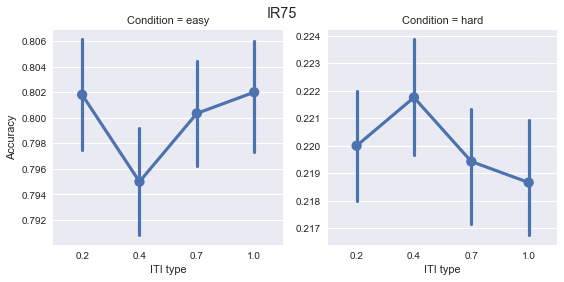

In [57]:
plot = sns.factorplot(data=data,x='ITI type',y='Accuracy',col='Condition',kind='point',sharey=False,
               ci=95);#,order=ITI_plot_order
#plot.set(alpha=0.5)
plt.subplots_adjust(top=0.9)
plot.fig.suptitle(SBJ) # can also get the figure from plt.gcf()

plt.savefig(results_dir+'BHV/accuracy/'+SBJ+'_acc_PE_ITI_hit'+fig_type)